<h1>Lab 4: Introduction to Recurrent Neural Networks(RNN)</h1>
<p>RNN are trained with the sequential data</p>

<h2>Objective:</h2>
Explore the workings of the RNNs and implement them on sequential data, including more advance RNN architecture such as Long short term memory (LSTMs) or (GRUs).


In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Load Dataset
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure equal length inputs
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=200),
  tf.keras.layers.LSTM(128, return_sequences=False),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 407ms/step - accuracy: 0.9738 - loss: 0.0777 - val_accuracy: 0.8550 - val_loss: 0.4891
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 413ms/step - accuracy: 0.9794 - loss: 0.0656 - val_accuracy: 0.8396 - val_loss: 0.5582
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 377ms/step - accuracy: 0.9812 - loss: 0.0591 - val_accuracy: 0.8526 - val_loss: 0.4698
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.9764 - loss: 0.0687 - val_accuracy: 0.8446 - val_loss: 0.5806
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 77s 392ms/step - accuracy: 0.9912 - loss: 0.0325 - val_accuracy: 0.8549 - val_loss: 0.8300
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 390ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.8396 - val_loss: 0.7751
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 78s 400ms/step - accuracy: 0.9937 - loss: 0.0224 - val_accuracy: 0.8471 - val_loss: 0.6488
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.9942 - loss: 0

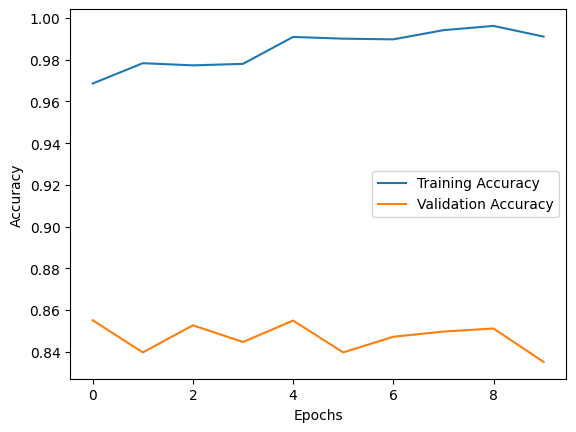

In [7]:
import matplotlib.pyplot as plt

# plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_pred = model.predict(X_test > 0.5).astype('int32')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 10000
maxlen = 100
def preprocess_input(text):
  tokenizer = Tokenizer(num_words=max_features)
  tokenizer.fit_on_texts([text])
  sequence = tokenizer.texts_to_sequences([text])
  padded_sequence = pad_sequences(sequence, maxlen=maxlen)
  return padded_sequence

# get input
user_input = input("Enter a review: ")

# preprocess input
pre_processed_input = preprocess_input(user_input)

# predict
prediction = model.predict(pre_processed_input)
sentiment = "positive" if prediction[0][0] > 0.5 else "negative"

# output the result

print(f"Predicted Sentiment: {sentiment} Probability: {prediction[0][0]:2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Sentiment: negative Probability: 0.406327
